In [28]:
from flowstar.reachability import Poly, Reach
load('interval_signals.py')
from matplotlib.pyplot import figure

# Review meeting
Thomas Wright

 - **Overall aim**:
     - Investigate integration of Taylor model flowpipe construction with temporal logic to model check contextual properties.

 - **General approach**
     - Signal monitoring over flow* flowpipes (with three-valued signals)

 - **Some challenges**:
     - *Uncertain contextual properties*:
     $$([a, b]\,X \mathrel\parallel [c,d]\,Y) \triangleright \varphi$$
     
     - *Differential contexts*:
     $$([a, b]\,X \mathrel\parallel [c,d]\,Y) \triangleright_{\partial} \varphi$$
     
     - *More general constrained contexts???*:
     $$\{\Phi \in [a, b]\,X\mathrel{:}\psi\} \triangleright \varphi$$

## Current progress

 - Implementing three-valued signals (using Python)
 
 - Signal monitoring over flowpipes (using interval Newton-Raphson iteration [1])
 
 - Wrapping flow* C++ API
 
 - Checking for context operators
 
--- 
 1. Ishii, D., Yonezaki, N., Goldsztejn, A.: Monitoring Temporal Properties using Interval Analysis.
IEICE Transactions on Fundamentals of Electronics, Communications and Computer Sciences E99-A (2016)


## A simple example:

<table style="width:100%; text-align: center !important;"> 
    <tr>
        <th>ODE:</th>
        <th>System:</th>
    </tr>
    <tr>
        <td rowspan="2">$\frac{\mathrm d [\mathrm{X}]}{\mathrm dt} = - [\mathrm{X}]$</td>
        <td>$[\mathrm X] \triangleq x.0$</td>
    </tr>
    <tr>
        <td>
            <img class="center" style="height: 4ex" src="images/affinity-exponential.png" />
        </td>
    </tr>
</table>

Initial condition: $[\mathrm X]_0 \in [4,5]$

In [87]:
variables = ['x']
odes      = [Poly(-1, 'x', 1, variables)]

C0 = Reach(
    variables,  # List of variables
    odes,       # ODEs 
    [(4,5)],    # Initial conditions
    5,          # Time horizon
    0.3,        # Step size
    order=10,   # Taylor model order
)

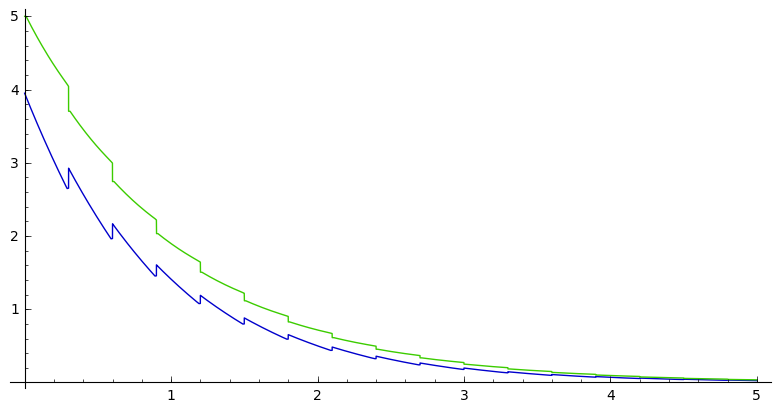

In [88]:
C0.sage_plot('x', 0.01).show(aspect_ratio=1/2)

### Wrapping flow*

Flow* wrapped in $\texttt{Reach}$ class using C++ API

In [89]:
variables = ['x']
odes      = [Poly(-1, 'x', 1, variables)] # [-x]

C0 = Reach(
    variables,  # List of variables
    odes,       # ODEs 
    [(4,5)],    # Initial conditions
    5,          # Time horizon
    0.3,        # Step size
    order=10,   # Taylor model order
)

This allows us to do interval evaluation:

In [90]:
C0((1,2))

[(0.49589666463878246, 1.8999751075031959)]

In [91]:
(xlo, xhi), = C0((1,2))
rect = polygon([(1, xlo), (2, xlo), (2, xhi), (1, xhi)], fill=False, color='red')
p = C0.sage_plot('x', 0.01) + rect
p.set_aspect_ratio(1/2)

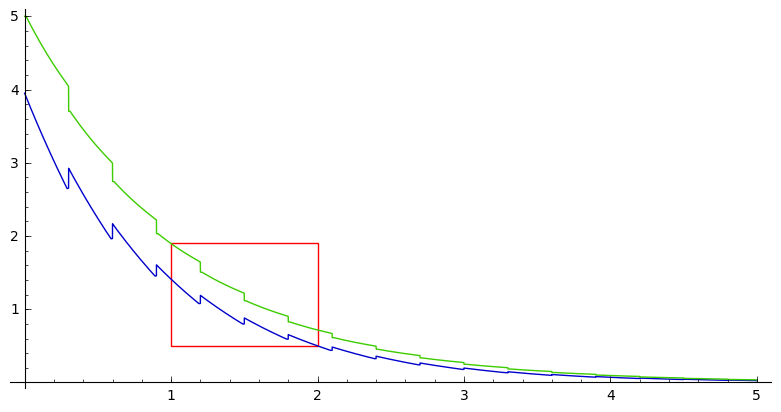

In [92]:
p

### Three-valued signal monitoring

We want to extract a three-valued
$$\varphi : \mathbb R_{\geq 0} \to \{ \texttt{True}, \texttt{False}, \bot \}$$
from a Taylor model.

For atomic propositions
$$\varphi \triangleq f(\mathbf x) > 0$$
we use Interval-Newton iteration.

$$ P \triangleq [\mathrm X] > 1
\qquad Q \triangleq [\mathrm X] < 2 $$

In [105]:
P = to_signal(f      = (lambda t: RIF(C0(t)[0]) - 1),
              fprime = (lambda t: -RIF(C0(t)[0])),
              domain = RIF(0,5))

  I  = [0.00000000000000000 .. 1.3437621616392701]
f(I) = [0.016424149317245007 .. 4.0000000000123830]


In [108]:
P

Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 1.3437621616392701], True), ([1.6416757200633169 .. 5.0000000000000000], False)])

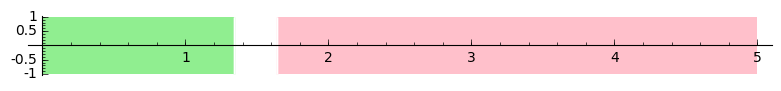

In [117]:
P.plot().show(aspect_ratio=1/5)

similarly,

In [112]:
Q = to_signal(f      = (lambda t: 3 - RIF(C0(t)[0])),
              fprime = (lambda t: RIF(C0(t)[0])),
              domain = RIF(0,5))

  I  = [0.00000000000000000 .. 0.21986641464906418]
f(I) = [-2.0000000000123830 .. 0.099332073259393195]


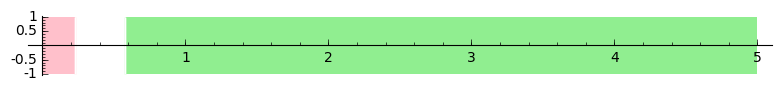

In [116]:
Q.plot().show(aspect_ratio=1/5)